<a href="https://colab.research.google.com/github/irenenjoki/datascience/blob/main/work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 7.249999999999986
Hypothetical Data: [[3, 60]]
Predicted Accident Severity: 31.900000000000002


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


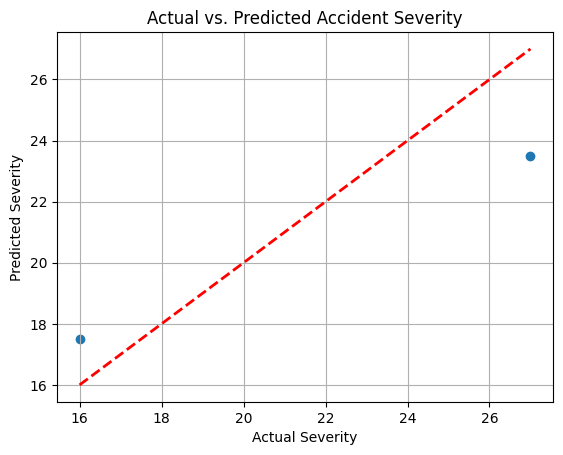

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Sample data
data = {
    'Independent_Variable1': [10, 20, 30, 40, 50, 60],
    'Independent_Variable2': [5, 15, 25, 35, 45, 55],
    'Severity': [16, 27, 28, 39, 39, 48],  # Corrected the Severity values
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the dependent variable (accident severity) and independent variables
X = df[['Independent_Variable1', 'Independent_Variable2']]
y = df['Severity']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Save the model for future use
joblib.dump(model, 'linear_regression_model.pkl')

# Use the trained model to predict accident severity for a hypothetical scenario
hypothetical_data = [[3, 60]]  # Assuming Road Condition = 3, Speed Limit = 60
predicted_severity = model.predict(hypothetical_data)

print(f'Hypothetical Data: {hypothetical_data}')
print(f'Predicted Accident Severity: {predicted_severity[0]}')


# Plot actual vs. predicted values
# Plot actual vs. predicted values with a regression line
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.xlabel('Actual Severity')
plt.ylabel('Predicted Severity')
plt.title('Actual vs. Predicted Accident Severity')
plt.grid(True)  # Add grid lines
plt.show()